![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Visualize and Standardize the data

6. Model Building and Testing

7. Transfer Learning

8. Conclusion and Interpretation

9. Further Explore

## 1. Import Libraries

Let us start by mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [245]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.4.1


## 2. Setting Options

In [246]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### Import the images given in two separate folders and answer following questions. 

###How many images are there in train and test data

In [247]:
import os 
no_mobile = os.listdir('/content/drive/MyDrive/dataset/Lab files CV with CNN_Questions and data set/mobile-images/no-mobile')
len(no_mobile)

121

In [248]:
import os 
yes_mobile = os.listdir('/content/drive/MyDrive/dataset/Lab files CV with CNN_Questions and data set/mobile-images/yes-mobile')
len(yes_mobile)

124

###  What is the percentage of images with and without mobile phone in the train and test data

In [249]:
121/(121+124)

0.49387755102040815

In [250]:
124/(121+124)

0.5061224489795918

### Visualize a few images to understand the data.

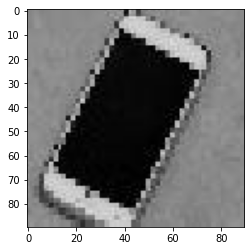

In [251]:
import cv2
img = cv2.imread('/content/drive/MyDrive/dataset/Lab files CV with CNN_Questions and data set/mobile-images/yes-mobile/img131.png')
plt.imshow(img)

## 4. Data Analysis and Preparation

### Read image files and save it to an array AND save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0)
### Check shape and size of the images

In [252]:
yes_img = []
yes_label = []

In [253]:
os.chdir('/content/drive/MyDrive/dataset/Lab files CV with CNN_Questions and data set/mobile-images/yes-mobile')
path = '/content/drive/MyDrive/dataset/Lab files CV with CNN_Questions and data set/mobile-images/'
for i in os.listdir(path + '/yes-mobile'):
  a = cv2.imread(i)
  a = cv2.resize(a, (128,128))
  yes_img.append(a)
  yes_label.append(1)

In [254]:
yes_img[1].shape

(128, 128, 3)

In [255]:
len(yes_img)

124

In [256]:
no_img = []
no_label = []
os.chdir('/content/drive/MyDrive/dataset/Lab files CV with CNN_Questions and data set/mobile-images/no-mobile')
path = '/content/drive/MyDrive/dataset/Lab files CV with CNN_Questions and data set/mobile-images/'
for i in os.listdir(path + '/no-mobile'):
  a = cv2.imread(i)
  a = cv2.resize(a, (128,128))
  no_img.append(a)
  no_label.append(0)

In [257]:
  no_img[1].shape

(128, 128, 3)

In [258]:
len(no_img)

121

### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [259]:
X_img =  np.concatenate((yes_img, no_img), axis=0)
len(X_img)

245

In [260]:
labels =  np.concatenate((yes_label, no_label), axis=0)
len(labels)

245

### Shuffle the above data and labels ( Data and label should be in sync)

In [261]:
from sklearn.utils import shuffle
X, y  = shuffle(X_img, labels, random_state = 1)

### Split the data into train and test

In [262]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

In [263]:
type(X_train)

numpy.ndarray

In [264]:
X_train.shape

(183, 128, 128, 3)

In [265]:
X_test.shape

(62, 128, 128, 3)

In [266]:
type(yes_img)

list

### Read the label csv and plot frequency distribution of "label"

In [267]:
label = pd.read_csv("/content/drive/MyDrive/dataset/Lab files CV with CNN_Questions and data set/mobile-images-data.csv")
label.head(10)

,filename,label
0,img56.png,No
1,img199.png,Yes
2,img107.png,No
3,img123.png,Yes
4,img193.png,Yes
5,img165.png,Yes
6,img36.png,No
7,img1.png,No
8,img21.png,No
9,img218.png,Yes


In [268]:
pd.value_counts(label['label'])

Yes    124
No     121
Name: label, dtype: int64

## 5. Visualize and Standardize the data

### Visualise the first 10 images in the X_train data and print their corresponding labels.

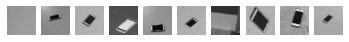

label for eACH of the above image : [0 1 1 1 1 1 0 1 1 1]


In [269]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap="gray")
  plt.axis('off')
plt.show()
print('label for eACH of the above image : %s' % (y_train[0:10]))

### Print shape of the X train and X test data

In [270]:
X_train.shape

(183, 128, 128, 3)

In [271]:
X_test.shape

(62, 128, 128, 3)

### Reshape the X_train and X_test to make it suitable for the input layer


In [272]:
X_train.shape

(183, 128, 128, 3)

In [273]:
X_test.shape

(62, 128, 128, 3)

### Normalize the data by dividing by 255

In [274]:
X_train_std = X_train/255.0

In [275]:
X_test_std = X_test/255.0

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [276]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1])

In [277]:
from tensorflow.keras.utils import to_categorical
y_train_onehot =to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

## 6. Model building & Testing

In [278]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import layers

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [279]:
nb_epoch = 30
rows, cols = 128,128
n_channels = 3
n_classes = 2
n_filter = 32
n_pool = 2
n_conv = 3
def CNN_Model():
  model = Sequential()
  # Input Layer
  model.add(Conv2D(n_filter, (n_conv,n_conv), activation = 'relu', input_shape = (rows, cols, n_channels)))

  # Hidden Layers
  model.add(layers.MaxPooling2D((2,2)))
  model.add(Conv2D(n_filter, (n_conv,n_conv), activation = 'relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Flatten())

  # Output Layer
  model.add(Dense(n_classes, activation = 'softmax'))
  return model

In [280]:
cnn = CNN_model()

### Compile the above model using appropriate loss and optimizers. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [281]:
sgd = optimizers.Adam(lr = 1e-3)
cnn.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics=['accuracy'])

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [282]:
history = cnn.fit(X_train_std, y_train_onehot, validation_data=(X_test_std, y_test_onehot), batch_size=32, epochs = nb_epoch, verbose=2)

Epoch 1/30
6/6 - 1s - loss: 0.6728 - accuracy: 0.5738 - val_loss: 0.6156 - val_accuracy: 0.7742
Epoch 2/30
6/6 - 0s - loss: 0.5690 - accuracy: 0.7705 - val_loss: 0.5011 - val_accuracy: 0.8548
Epoch 3/30
6/6 - 0s - loss: 0.4379 - accuracy: 0.8415 - val_loss: 0.5570 - val_accuracy: 0.7742
Epoch 4/30
6/6 - 0s - loss: 0.3657 - accuracy: 0.8743 - val_loss: 0.3989 - val_accuracy: 0.8710
Epoch 5/30
6/6 - 0s - loss: 0.2984 - accuracy: 0.8962 - val_loss: 0.3617 - val_accuracy: 0.8387
Epoch 6/30
6/6 - 0s - loss: 0.2798 - accuracy: 0.9235 - val_loss: 0.3151 - val_accuracy: 0.9032
Epoch 7/30
6/6 - 0s - loss: 0.2554 - accuracy: 0.9126 - val_loss: 0.4019 - val_accuracy: 0.8387
Epoch 8/30
6/6 - 0s - loss: 0.1986 - accuracy: 0.9290 - val_loss: 0.7842 - val_accuracy: 0.7419
Epoch 9/30
6/6 - 0s - loss: 0.1589 - accuracy: 0.9399 - val_loss: 0.5389 - val_accuracy: 0.8387
Epoch 10/30
6/6 - 0s - loss: 0.1041 - accuracy: 0.9727 - val_loss: 0.4924 - val_accuracy: 0.8065
Epoch 11/30
6/6 - 0s - loss: 0.0797 - a

### Evaluate the model on test data and print loss and accuracy

In [283]:
cnn.evaluate(X_test_std, y_test_onehot)

2/2 [==============================] - 0s 8ms/step - loss: 0.7889 - accuracy: 0.7903


[0.7888821959495544, 0.7903226017951965]

### Predict label data of the test data and check confusion matrix

In [284]:
y_pred = cnn.predict(X_test_std)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [285]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[24,  2],
       [11, 25]])

### Display test images and their predicted label for a few samples

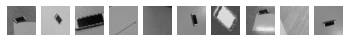

Predicted label for each of the above image : [1 1 0 0 0 1 0 0 0 1]
Original label for each of the above image : [1 1 1 0 0 1 1 1 0 1]


In [286]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_test_std[i],cmap="gray")
  plt.axis('off')
plt.show()
print('Predicted label for each of the above image : %s' % (y_pred_class[0:10]))
print('Original label for each of the above image : %s' % (y_test[0:10]))

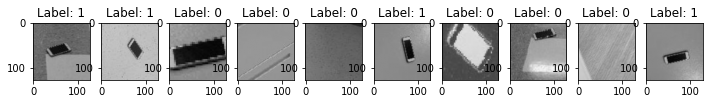

In [287]:
sample = cnn.predict_classes(X_test_std)

test_pred = X_test_std
def show_pred(show, test_pred, sample):
    fig, axs = plt.subplots(1, show, figsize=(12, 8))
    for i in range(0, show):
        axs[i].imshow(test_pred[i], label=sample[i])
        axs[i].set_title('Label: {}'.format(sample[i]))
        
show_pred(10, test_pred, sample)

## 7. Transfer Learning

### Import pre-trained VGG16 model. Make the last three 3 layers trainable and add one dense layer and an output layer.


In [288]:
from tensorflow.keras.applications.vgg16 import VGG16
cnn_vgg16 = VGG16(weights = 'imagenet', include_top = False, input_shape = (128,128,3))

#Freezing all the layers excpt the last 3 layers
for layers in cnn_vgg16.layers[:-3]:
  layers.trainable = False

In [293]:
from tensorflow.keras import layers
cnn_tl = Sequential()
cnn_tl.add(cnn_vgg16)

cnn_tl.add(layers.Flatten())
cnn_tl.add(layers.Dense(1024, activation= 'relu'))
cnn_tl.add(layers.Dropout(0.5))
cnn_tl.add(layers.Dense(2, activation= 'softmax'))

cnn_tl

In [294]:
cnn_tl.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 2050      
Total params: 23,106,370
Trainable params: 13,111,298
Non-trainable params: 9,995,072
_________________________________________________________________


### Complie the above model using appropriate loss and optimizer

In [295]:
cnn_tl.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics=['accuracy'])

### Fit the above model 

In [296]:
cnn_tl.fit(X_train_std, y_train_onehot, validation_data=(X_test_std, y_test_onehot), batch_size=32, epochs = nb_epoch, verbose=2)

Epoch 1/30
6/6 - 8s - loss: 3.0214 - accuracy: 0.6230 - val_loss: 0.4571 - val_accuracy: 0.9194
Epoch 2/30
6/6 - 0s - loss: 1.6844 - accuracy: 0.8415 - val_loss: 0.3821 - val_accuracy: 0.9194
Epoch 3/30
6/6 - 0s - loss: 0.2906 - accuracy: 0.9454 - val_loss: 0.4338 - val_accuracy: 0.9355
Epoch 4/30
6/6 - 0s - loss: 0.2454 - accuracy: 0.9672 - val_loss: 0.5482 - val_accuracy: 0.9355
Epoch 5/30
6/6 - 0s - loss: 0.1957 - accuracy: 0.9617 - val_loss: 0.3699 - val_accuracy: 0.9516
Epoch 6/30
6/6 - 0s - loss: 0.1246 - accuracy: 0.9727 - val_loss: 0.1873 - val_accuracy: 0.9677
Epoch 7/30
6/6 - 0s - loss: 0.0407 - accuracy: 0.9891 - val_loss: 0.1845 - val_accuracy: 0.9677
Epoch 8/30
6/6 - 0s - loss: 0.0336 - accuracy: 0.9945 - val_loss: 0.1843 - val_accuracy: 0.9677
Epoch 9/30
6/6 - 0s - loss: 0.0410 - accuracy: 0.9891 - val_loss: 0.2080 - val_accuracy: 0.9677
Epoch 10/30
6/6 - 0s - loss: 0.0115 - accuracy: 0.9945 - val_loss: 0.1416 - val_accuracy: 0.9677
Epoch 11/30
6/6 - 0s - loss: 4.7907e-04

### Evaluate the above model and print accuracy and confusion matrix

In [297]:
cnn_tl.evaluate(X_test_std, y_test_onehot)

2/2 [==============================] - 0s 57ms/step - loss: 0.1967 - accuracy: 0.9677


[0.19669868052005768, 0.9677419066429138]

In [298]:
y_pred = cnn_tl.predict(X_test_std)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [299]:
confusion_matrix(y_test, y_pred_class)

array([[26,  0],
       [ 2, 34]])

## 8. Conclusion and Interpretation


### Write your observations and findings

In [ ]:
Compare to the CNN model, transfer learning VGG16 model could predict the images very effictively with added hidden and dense layers. 

## 9. Further explore (Optional)

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

<Figure size 432x288 with 0 Axes>

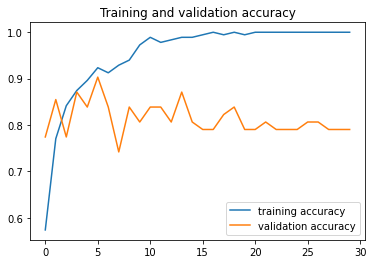

<Figure size 432x288 with 0 Axes>

In [300]:
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()


### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the one in this notebook? 